# Preliminary operations

In [11]:
#@title Drive mount

from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/Assignment/OriginalDataset

Mounted at /content/gdrive
/content/gdrive/MyDrive/Assignment/OriginalDataset


In [1]:
#@title Main libraries
import pandas as pd
import numpy as np

import os
import random

from sklearn.utils import  compute_class_weight

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
tfk = tf.keras
tfkl = tf.keras.layers

In [2]:
#@title Reproducibility
# Setting a seed for reproducibility
seed = 90 
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print("The seed is: " + str(seed))

The seed is: 90


# Access data

### Data hyperparameters

In [12]:
data_hyperparameters = {
    'batch_size': 64,
    'resized_shape_height': 100,
    'resized_shape_width': 100,
    'color_mode': 'grayscale'
}

### Defining augmentation

In [13]:
# This function is used to create a dictionary with the hyperparameters of the augmentation 
def get_augmentation_hyperparameters(selected_dictionary):
  
  if selected_dictionary==0:
    augmentation_hyperparameters={}
    augmentation_hyperparameters['name']= 'Basic_Augmentation'
    augmentation_hyperparameters['rotation_range']= 45
    augmentation_hyperparameters['width_shift_range']= 0
    augmentation_hyperparameters['height_shift_range']= 0
    augmentation_hyperparameters['brightness_range']= [0.8, 1.2]
    augmentation_hyperparameters['horizontal_flip']= True
    augmentation_hyperparameters['vertical_flip']= False
    augmentation_hyperparameters['zoom_range']= [0.7, 1.2]
    augmentation_hyperparameters['rescale_range']= 1/255.
    augmentation_hyperparameters['fill_mode']= 'reflect'
    augmentation_hyperparameters['cval']= 0
    
  elif selected_dictionary==1:
    augmentation_hyperparameters={}
    augmentation_hyperparameters['name']= 'Aggressive_Augmentation'
    augmentation_hyperparameters['rotation_range']= 90
    augmentation_hyperparameters['width_shift_range']= 0.2
    augmentation_hyperparameters['height_shift_range']= 0.2
    augmentation_hyperparameters['brightness_range']= [0.5, 1.5]
    augmentation_hyperparameters['horizontal_flip']= True
    augmentation_hyperparameters['vertical_flip']= False
    augmentation_hyperparameters['zoom_range']= [0.5, 1.5]
    augmentation_hyperparameters['rescale_range']= 1/255.
    augmentation_hyperparameters['fill_mode']= 'reflect'
    augmentation_hyperparameters['cval']= 0

  elif selected_dictionary==2:
    augmentation_hyperparameters={}
    augmentation_hyperparameters['name']= 'Kind_Augmentation'
    augmentation_hyperparameters['rotation_range']= 0
    augmentation_hyperparameters['width_shift_range']= 0.1
    augmentation_hyperparameters['height_shift_range']= 0.1
    augmentation_hyperparameters['brightness_range']=  [0.9, 1.1]
    augmentation_hyperparameters['horizontal_flip']= True
    augmentation_hyperparameters['vertical_flip']= False
    augmentation_hyperparameters['zoom_range']= [0.9, 1.1]
    augmentation_hyperparameters['rescale_range']= 1/255.
    augmentation_hyperparameters['fill_mode']= 'reflect'
    augmentation_hyperparameters['cval']= 0
  
  return augmentation_hyperparameters

In [14]:
dictionary = get_augmentation_hyperparameters(2)


aug_train_gen = ImageDataGenerator(
    rotation_range = dictionary['rotation_range'],
    height_shift_range = dictionary['height_shift_range'],
    width_shift_range = dictionary['width_shift_range'], 
    zoom_range = dictionary['zoom_range'],
    horizontal_flip = dictionary['horizontal_flip'],
    vertical_flip = dictionary['vertical_flip'], 
    fill_mode = dictionary['fill_mode'],
    cval = dictionary['cval'],
    rescale = dictionary['rescale_range'],
    brightness_range = dictionary['brightness_range'],
    #preprocessing_function= preprocess_input)
)

### Data generators

In [15]:
dataset_dir = "/content/gdrive/MyDrive/Assignment/Clean_And_Preprocessed_Dataset/CLEAN_and_HMP/" 
training_dir = os.path.join(dataset_dir, 'TRAIN')
validation_dir = os.path.join(dataset_dir, 'VAL')
test_dir = os.path.join(dataset_dir, 'TEST')

In [16]:
aug_training_set = aug_train_gen.flow_from_directory(directory = training_dir,
                                                  target_size = (data_hyperparameters['resized_shape_height'], data_hyperparameters['resized_shape_width']),
                                                  color_mode = data_hyperparameters['color_mode'],
                                                  class_mode = 'categorical',
                                                  batch_size = data_hyperparameters['batch_size'],
                                                  shuffle = True,
                                                  seed = seed)

noaug_training_set = ImageDataGenerator(rescale = 1/255.).flow_from_directory(directory = training_dir,
                                                                              target_size = (data_hyperparameters['resized_shape_height'], data_hyperparameters['resized_shape_width']),
                                                                              color_mode = data_hyperparameters['color_mode'],
                                                                              class_mode = 'categorical',
                                                                              batch_size = data_hyperparameters['batch_size'],
                                                                              shuffle = True,
                                                                              seed = seed)

validation_set = ImageDataGenerator(rescale = 1/255.).flow_from_directory(directory = validation_dir,
                                                                target_size = (data_hyperparameters['resized_shape_height'], data_hyperparameters['resized_shape_width']),
                                                                color_mode = data_hyperparameters['color_mode'],
                                                                class_mode = 'categorical',
                                                                batch_size = data_hyperparameters['batch_size'],
                                                                shuffle = True,
                                                                seed = seed)
test_set = ImageDataGenerator(rescale = 1/255.).flow_from_directory(directory = test_dir,
                                                                target_size = (data_hyperparameters['resized_shape_height'], data_hyperparameters['resized_shape_width']),
                                                                color_mode = data_hyperparameters['color_mode'],
                                                                class_mode = 'categorical',
                                                                batch_size = data_hyperparameters['batch_size'],
                                                                shuffle = False,
                                                                seed = seed)


Found 11124 images belonging to 3 classes.
Found 11124 images belonging to 3 classes.
Found 1253 images belonging to 3 classes.
Found 3093 images belonging to 3 classes.


In [17]:
# @title Target labels
labels = list(aug_training_set.class_indices.keys())
print("Labels: ", labels)

Labels:  ['normal', 'pneumonia', 'tubercolosis']


In [18]:
test_set.class_indices

{'normal': 0, 'pneumonia': 1, 'tubercolosis': 2}

# Model definition

### Resnet with SE-blocks
**Architecture**: Residual Network (ResNet) 

**Characteristics**: residual blocks exploiting skip connections, that allow the network to go deeper without suffering form the vanishing gradient problem. Actually, 2 types of residual blocks: 

 -  *convolutional blocks* = to reduce spatial extent and increase the Receptive Field
  
-   *identity blocks* = shortcut that equalizes input and output block dimensions

Both before the concatenation with the shortcut have a *Squeeze-and-Excite block* (abbreviated as SE-block) = to introduce a  channel attention mechanism

In [ ]:
# @title Main blocks definition

def se_block(in_block, ch, ratio=16):
    x = tfkl.GlobalAveragePooling2D()(in_block)
    x = tfkl.Dense(ch//ratio, activation='relu')(x)
    x = tfkl.Dense(ch, activation='sigmoid')(x)
    x = tfkl.multiply([in_block, x])
    return x

def RN_Convolutional_block(block_input, num_filters, kernel_size=3, padding_mode='same', a_function='relu', dp_rate_1=0.3): 
   
  block_0 = tfkl.Conv2D( num_filters,
                            kernel_size= kernel_size,
                            strides= (2,2),
                            padding=padding_mode,
                            kernel_initializer= tfk.initializers.HeUniform(seed),
                            bias_initializer='zeros')(block_input)
  block_0 = tfkl.BatchNormalization()(block_0)
   
  block_1 = tfkl.Conv2D( num_filters,
                            kernel_size= kernel_size,
                            strides= (2,2),
                            padding=padding_mode,
                            kernel_initializer= tfk.initializers.HeUniform(seed),
                            bias_initializer='zeros')(block_input)
  block_1 = tfkl.BatchNormalization()(block_1)
  block_1 = tfkl.Activation(a_function)(block_1)
  block_1 = tfkl.Dropout(dp_rate_1)(block_1)

  block_2 = tfkl.Conv2D( num_filters,
                            kernel_size= kernel_size,
                            strides= (1,1),
                            padding=padding_mode,
                            kernel_initializer= tfk.initializers.HeUniform(seed),
                            bias_initializer='zeros')(block_1)
  block_2 = tfkl.BatchNormalization()(block_2)

  SE_block = se_block(block_2, ch=num_filters)

  concat = tfkl.Add()([block_0, SE_block])
  output = tfkl.Activation(a_function)(concat)

  return output

def RN_Identity_block(block_input, num_filters, kernel_size=3, padding_mode='same', a_function='relu', dp_rate_1=0.3): 

  block_1 = tfkl.Conv2D( num_filters,
                            kernel_size= kernel_size,
                            strides= (1,1),
                            padding=padding_mode,
                            kernel_initializer= tfk.initializers.HeUniform(seed),
                            bias_initializer='zeros')(block_input)
  block_1 = tfkl.BatchNormalization()(block_1)
  block_1 = tfkl.Activation(a_function)(block_1)
  block_1 = tfkl.Dropout(dp_rate_1)(block_1)

  block_2 = tfkl.Conv2D( num_filters,
                            kernel_size= kernel_size,
                            strides= (1,1),
                            padding=padding_mode,
                            kernel_initializer= tfk.initializers.HeUniform(seed),
                            bias_initializer='zeros')(block_1)
  block_2 = tfkl.BatchNormalization()(block_2)

  SE_block = se_block(block_2, ch=num_filters)

  concat = tfkl.Add()([block_input, SE_block])
  output = tfkl.Activation(a_function)(concat)

  return output

In [ ]:
# @title Architecture

def ResNet(input_shape, n_output, N=8, kernel_size=3, padding_mode='same', a_function='relu', dp_rate =0.3, dp_rate_fc= 0.3, lr=1e-3): 
  input_layer = tfkl.Input(shape=input_shape, name='input_layer')

  RN_layers = tfkl.Conv2D( 64,
                            kernel_size= kernel_size,
                            strides= (1,1),
                            padding=padding_mode,
                            kernel_initializer= tfk.initializers.HeUniform(seed),
                            bias_initializer='zeros')(input_layer)
  RN_layers = tfkl.BatchNormalization()(RN_layers)
  RN_layers = tfkl.Activation(a_function)(RN_layers)
  RN_layers = tfkl.MaxPooling2D()(RN_layers)

  # The Resenet will have N blocks 
  # with n. filters starting at 64 and doubling every 2 blocks
  # first two blocks are Identity blocks
  # the following are Conv and Identity alternated
  num_filters = 64  

  RN_layers = RN_Identity_block(RN_layers, num_filters, kernel_size=3, padding_mode='same', a_function='relu', dp_rate_1= dp_rate)
  RN_layers = RN_Identity_block(RN_layers, num_filters, kernel_size=3, padding_mode='same', a_function='relu', dp_rate_1= dp_rate)

  for i in range(int((N-2)/2)):
    num_filters = num_filters*2

    RN_layers = RN_Convolutional_block(RN_layers, num_filters, kernel_size=3, padding_mode='same', a_function='relu', dp_rate_1= dp_rate)
    RN_layers = RN_Identity_block(RN_layers, num_filters, kernel_size=3, padding_mode='same', a_function='relu', dp_rate_1= dp_rate)


  # The top of the model will be a GAP + FC part
  RN_layers = tfkl.GlobalAveragePooling2D(name='GAP_layer')(RN_layers)
  FC_net = tfkl.Flatten(name='Flatten')(RN_layers)
  FC_net = tfkl.Dropout(dp_rate_fc, seed=seed)(FC_net)
  FC_net = tfkl.Dense(units= 512, name='Classifier', kernel_initializer=tfk.initializers.HeUniform(seed), activation='relu')(FC_net)
  FC_net = tfkl.Dropout(dp_rate_fc, seed=seed)(FC_net)
  FC_net = tfkl.Dense(units= n_output, name='Output', kernel_initializer=tfk.initializers.GlorotUniform(seed), activation='softmax')(FC_net)

  # input→output
  model = tfk.Model(inputs=input_layer, outputs=FC_net, name='ResNet')

  # Compile and return
  model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(lr), metrics=['accuracy', 'Precision', 'Recall'])

  return model

In [ ]:
# @title Building the model

n_channels = 1 if data_hyperparameters['color_mode']=='grayscale' else 3
input_shape = (data_hyperparameters['resized_shape_height'],data_hyperparameters['resized_shape_width'],n_channels) 
n_output = len(labels)

print(input_shape)
print(n_output)

(100, 100, 1)
3


In [ ]:
Resnet_model = ResNet(input_shape, n_output, N=8, kernel_size=3, padding_mode='same', a_function='relu', dp_rate =0.3, dp_rate_fc= 0.3, lr=1e-3)

In [ ]:
'''tfk.utils.plot_model(
    Resnet_model,
    to_file="models/ResNet_model_03012023.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    #layer_range=None,
)'''

'tfk.utils.plot_model(\n    Resnet_model,\n    to_file="models/ResNet_model_03012023.png",\n    show_shapes=False,\n    show_dtype=False,\n    show_layer_names=True,\n    rankdir="TB",\n    expand_nested=False,\n    dpi=96,\n    #layer_range=None,\n)'

In [ ]:
Resnet_model.summary()

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 100, 64) 640         input_layer[0][0]                
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 100, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 100, 100, 64) 0           batch_normalization[0][0]        
_____________________________________________________________________________________________

In [22]:
def evaluate_model_m(model, test_set, target):

  """ Function used to evaluate model's performances on the local test set, display of confusion matrix """
  """ Model from trained model variable """

  labels = list(test_set.class_indices.keys())
  
  predictions = model.predict(test_set)
  metrics= {
    "predictions" : predictions,
    "target": target,
    "cm": confusion_matrix(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), normalize='true', ),
    "accuracy" : accuracy_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1)),
    "precision" : precision_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro'),
    "recall" : recall_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro'),
    "f1" : f1_score(np.argmax(target, axis=-1), np.argmax(predictions, axis=-1), average='macro')  }
  
  print("Accuracy: "+ str(metrics["accuracy"]))
  print("F1 score: "+ str(metrics["f1"]))
  cm = metrics["cm"]
  plt.figure(figsize=(15,15))
  sns.heatmap(cm.T, annot=True, fmt='.2f', xticklabels=list(labels), yticklabels=list(labels))
  plt.xlabel('True labels')
  plt.ylabel('Predicted labels')
  plt.show()

  return metrics

# Model training 
> Unbalanced dataset



In [19]:
train_gen = aug_training_set
valid_gen = validation_set
test_gen = test_set

train_target = train_gen.classes
val_target = valid_gen.classes
test_target = test_gen.classes

train_target_cat = tfk.utils.to_categorical(train_gen.classes)
val_target_cat = tfk.utils.to_categorical(valid_gen.classes)
test_target_cat = tfk.utils.to_categorical(test_gen.classes)

In [ ]:
epochs = 200
bs = data_hyperparameters['batch_size']
class_weights = dict(zip(np.unique(train_target), compute_class_weight(class_weight = "balanced", classes = np.unique(train_target), y = train_target)))
monmtr = 'val_accuracy'

In [ ]:
history = Resnet_model.fit(
    x = train_gen,
    epochs = epochs,
    #class_weight = class_weights,
    batch_size = bs, 
    validation_data = valid_gen,
    callbacks=[
        tfk.callbacks.EarlyStopping(monitor=monmtr, patience=20, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor=monmtr, patience=3, factor=0.5, min_lr=1e-8),
    ] 
).history

Epoch 1/200
174/174 [==============================] - 65s 346ms/step - loss: 0.6309 - accuracy: 0.7653 - precision: 0.7844 - recall: 0.7407 - val_loss: 2.0021 - val_accuracy: 0.5938 - val_precision: 0.5942 - val_recall: 0.5914
Epoch 2/200
174/174 [==============================] - 16s 93ms/step - loss: 0.3874 - accuracy: 0.8485 - precision: 0.8601 - recall: 0.8341 - val_loss: 0.7182 - val_accuracy: 0.6664 - val_precision: 0.6688 - val_recall: 0.6656
Epoch 3/200
174/174 [==============================] - 16s 91ms/step - loss: 0.3237 - accuracy: 0.8748 - precision: 0.8822 - recall: 0.8669 - val_loss: 0.6663 - val_accuracy: 0.7606 - val_precision: 0.7645 - val_recall: 0.7566
Epoch 4/200
174/174 [==============================] - 16s 91ms/step - loss: 0.2825 - accuracy: 0.8913 - precision: 0.8971 - recall: 0.8858 - val_loss: 0.7522 - val_accuracy: 0.7997 - val_precision: 0.8006 - val_recall: 0.7981
Epoch 5/200
174/174 [==============================] - 16s 91ms/step - loss: 0.2622 - accur

Epoch 37/200
174/174 [==============================] - 16s 91ms/step - loss: 0.0724 - accuracy: 0.9722 - precision: 0.9723 - recall: 0.9722 - val_loss: 0.1841 - val_accuracy: 0.9385 - val_precision: 0.9392 - val_recall: 0.9370
Epoch 38/200
174/174 [==============================] - 16s 92ms/step - loss: 0.0702 - accuracy: 0.9739 - precision: 0.9739 - recall: 0.9737 - val_loss: 0.1952 - val_accuracy: 0.9338 - val_precision: 0.9345 - val_recall: 0.9330
Epoch 39/200
174/174 [==============================] - 16s 91ms/step - loss: 0.0662 - accuracy: 0.9755 - precision: 0.9755 - recall: 0.9752 - val_loss: 0.1952 - val_accuracy: 0.9362 - val_precision: 0.9369 - val_recall: 0.9362
Epoch 40/200
174/174 [==============================] - 16s 93ms/step - loss: 0.0702 - accuracy: 0.9737 - precision: 0.9737 - recall: 0.9734 - val_loss: 0.1961 - val_accuracy: 0.9377 - val_precision: 0.9385 - val_recall: 0.9377
Epoch 41/200
174/174 [==============================] - 16s 91ms/step - loss: 0.0676 - a

In [ ]:
Resnet_model.save("C:/Users/Andrea Braccio/Desktop/HMP_ResNet_model_01022023") #save the model

C:\Anaconda\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: C:/Users/Andrea Braccio/Desktop/HMP_ResNet_model_01022023\assets


Accuracy: 0.9553831231813773
F1 score: 0.9416084832952768


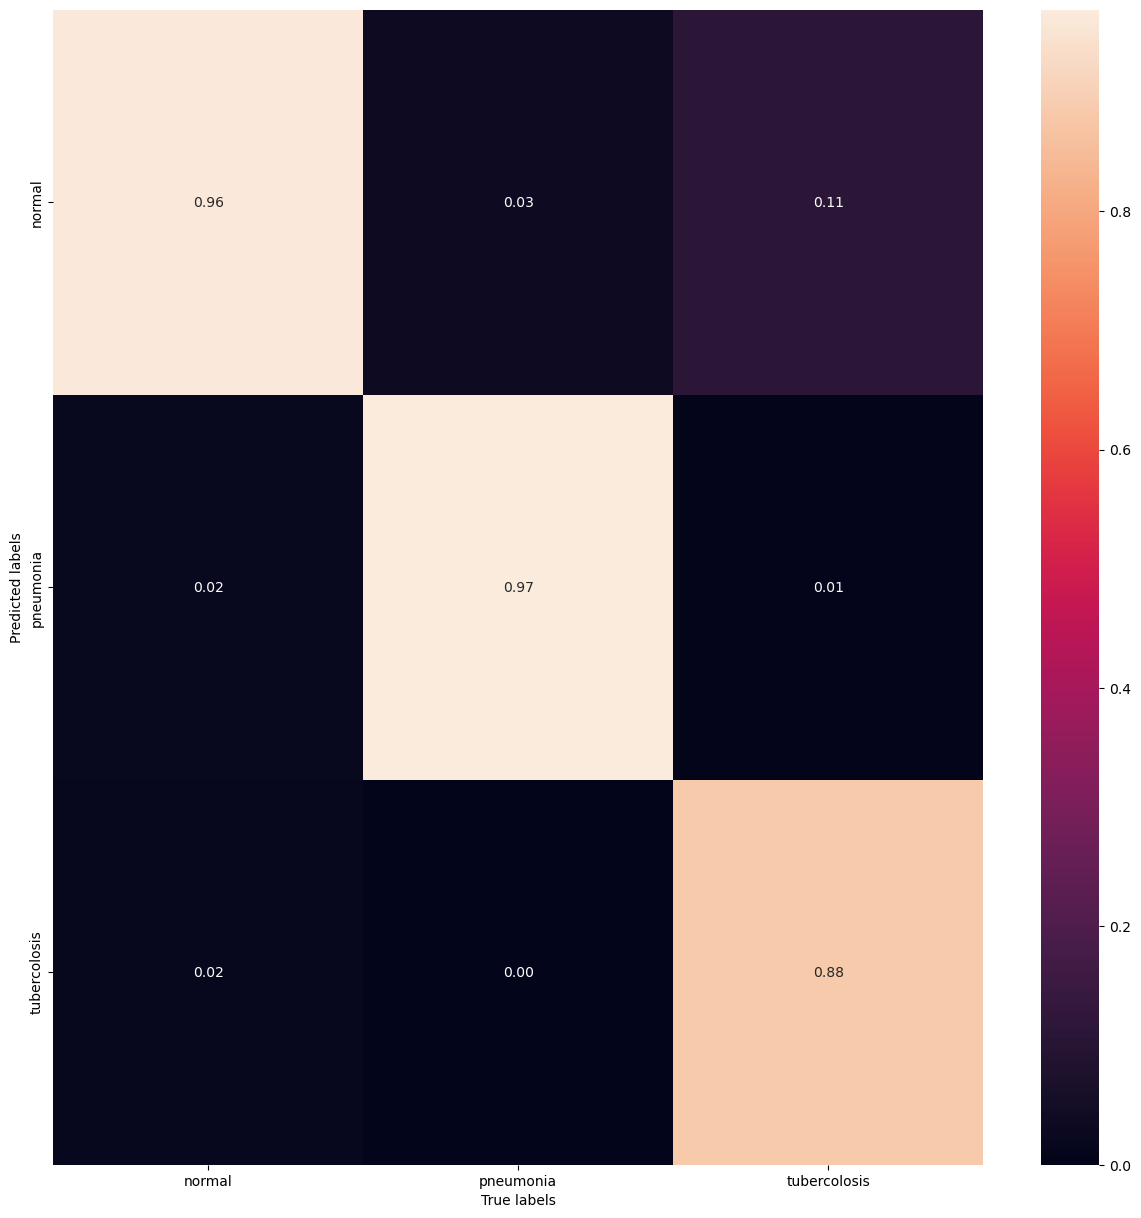

In [ ]:
#m = Resnet_model
#m = tfk.models.load_model("models/ResNet_model_03012023")
# ret = evaluate_model_m(m, train_gen, train_target_cat)
# ret = evaluate_model_m(m, valid_gen, val_target_cat)
train200 = evaluate_model_m(Resnet_model, test_gen, test_target_cat)

In [ ]:
arr_pred = np.asarray(train200['predictions'])


In [ ]:
np.save('C:/Users/Andrea Braccio/Desktop/predictions_HMP_Resnet_010223.npy', arr_pred)

In [20]:
resnet = tfk.models.load_model("/content/gdrive/MyDrive/AI project/models/2.2. HMP_ResNet_model_01022023")

In [ ]:
evaluate_model_m(resnet, test_gen, test_target_cat)